In [23]:
from turtle import color
import tables
from tables import *
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA 
import glob 
import matplotlib.pyplot as plt
#import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import tqdm

In [24]:
#function to retrieve parameter values from cta dataset
def get_img(fname):
    file = tables.open_file(fname,"r")
    #visualize images from the telescope
    img = file.root.dl1.event.telescope.images.LST_LSTCam.col("image")
    #number of images in fname
    nb_img = img.shape[0]

    return  img, nb_img

In [25]:
def get_img_matrix(img, nb_img):
    htable = np.fromfile("injunction_table_lst.pny", offset=8, dtype=np.uint16)
    matrix = np.zeros(55*55)

    mat = np.zeros((nb_img,55,55),dtype=np.float32)

    for i in range(nb_img):
        matrix[htable] = img[i]
        res = matrix.reshape(55,55)
        mat[i] = res

    return mat

In [26]:
#retrieve all the files from our dataset
train_fnames = glob.glob('Data/training/*.h5',recursive=True)
test_fnames = glob.glob('Data/testing/*.h5',recursive=True)
images = []
mat_val = []

for inputfile in tqdm.tqdm(train_fnames + test_fnames):
    image, size = get_img(inputfile)
    images.append(image)

    mat_val.append( get_img_matrix(image,size))

100%|██████████| 1000/1000 [00:49<00:00, 20.24it/s]


In [27]:
# principal component analysis on images
def pca(img):

    #Scale data before applying PCA
    scaling = StandardScaler()
    data = img.data

    #use fit and transform method
    scaling.fit(data)
    Scaled_data = scaling.transform(data)

    #set the n_components
    principal = PCA(n_components=500)
    principal.fit(Scaled_data)
    x = principal.transform(Scaled_data)
    # Check the values of eigen vectors
    # prodeced by principal components
    #print("composants principaux ",principal.components_)
    # check how much variance is explained by each principal component
    explained_variance = principal.explained_variance_ratio_
    #print("variance : ",explained_variance)
    explained_variance = np.insert(explained_variance,0,0) #setting x=0 ; y=0 to make the scree plot

    #preparing the cumulative variance data
    cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
    explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
    cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

    scores = pd.DataFrame(data=x)
    names = []
    for r in range(500):
        names.append( 'PC'+str(r) )
    scores.columns = [names]
    #print(scores)
    pc_df = pd.DataFrame(['','PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'PC109', 'PC110', 'PC111', 'PC112', 'PC113', 'PC114', 'PC115', 'PC116', 'PC117', 'PC118', 'PC119', 'PC120', 'PC121', 'PC122', 'PC123', 'PC124', 'PC125', 'PC126', 'PC127', 'PC128', 'PC129', 'PC130', 'PC131', 'PC132', 'PC133', 'PC134', 'PC135', 'PC136', 'PC137', 'PC138', 'PC139', 'PC140', 'PC141', 'PC142', 'PC143', 'PC144', 'PC145', 'PC146', 'PC147', 'PC148', 'PC149', 'PC150', 'PC151', 'PC152', 'PC153', 'PC154', 'PC155', 'PC156', 'PC157', 'PC158', 'PC159', 'PC160', 'PC161', 'PC162', 'PC163', 'PC164', 'PC165', 'PC166', 'PC167', 'PC168', 'PC169', 'PC170', 'PC171', 'PC172', 'PC173', 'PC174', 'PC175', 'PC176', 'PC177', 'PC178', 'PC179', 'PC180', 'PC181', 'PC182', 'PC183', 'PC184', 'PC185', 'PC186', 'PC187', 'PC188', 'PC189', 'PC190', 'PC191', 'PC192', 'PC193', 'PC194', 'PC195', 'PC196', 'PC197', 'PC198', 'PC199', 'PC200', 'PC201', 'PC202', 'PC203', 'PC204', 'PC205', 'PC206', 'PC207', 'PC208', 'PC209', 'PC210', 'PC211', 'PC212', 'PC213', 'PC214', 'PC215', 'PC216', 'PC217', 'PC218', 'PC219', 'PC220', 'PC221', 'PC222', 'PC223', 'PC224', 'PC225', 'PC226', 'PC227', 'PC228', 'PC229', 'PC230', 'PC231', 'PC232', 'PC233', 'PC234', 'PC235', 'PC236', 'PC237', 'PC238', 'PC239', 'PC240', 'PC241', 'PC242', 'PC243', 'PC244', 'PC245', 'PC246', 'PC247', 'PC248', 'PC249', 'PC250', 'PC251', 'PC252', 'PC253', 'PC254', 'PC255', 'PC256', 'PC257', 'PC258', 'PC259', 'PC260', 'PC261', 'PC262', 'PC263', 'PC264', 'PC265', 'PC266', 'PC267', 'PC268', 'PC269', 'PC270', 'PC271', 'PC272', 'PC273', 'PC274', 'PC275', 'PC276', 'PC277', 'PC278', 'PC279', 'PC280', 'PC281', 'PC282', 'PC283', 'PC284', 'PC285', 'PC286', 'PC287', 'PC288', 'PC289', 'PC290', 'PC291', 'PC292', 'PC293', 'PC294', 'PC295', 'PC296', 'PC297', 'PC298', 'PC299', 'PC300', 'PC301', 'PC302', 'PC303', 'PC304', 'PC305', 'PC306', 'PC307', 'PC308', 'PC309', 'PC310', 'PC311', 'PC312', 'PC313', 'PC314', 'PC315', 'PC316', 'PC317', 'PC318', 'PC319', 'PC320', 'PC321', 'PC322', 'PC323', 'PC324', 'PC325', 'PC326', 'PC327', 'PC328', 'PC329', 'PC330', 'PC331', 'PC332', 'PC333', 'PC334', 'PC335', 'PC336', 'PC337', 'PC338', 'PC339', 'PC340', 'PC341', 'PC342', 'PC343', 'PC344', 'PC345', 'PC346', 'PC347', 'PC348', 'PC349', 'PC350', 'PC351', 'PC352', 'PC353', 'PC354', 'PC355', 'PC356', 'PC357', 'PC358', 'PC359', 'PC360', 'PC361', 'PC362', 'PC363', 'PC364', 'PC365', 'PC366', 'PC367', 'PC368', 'PC369', 'PC370', 'PC371', 'PC372', 'PC373', 'PC374', 'PC375', 'PC376', 'PC377', 'PC378', 'PC379', 'PC380', 'PC381', 'PC382', 'PC383', 'PC384', 'PC385', 'PC386', 'PC387', 'PC388', 'PC389', 'PC390', 'PC391', 'PC392', 'PC393', 'PC394', 'PC395', 'PC396', 'PC397', 'PC398', 'PC399', 'PC400', 'PC401', 'PC402', 'PC403', 'PC404', 'PC405', 'PC406', 'PC407', 'PC408', 'PC409', 'PC410', 'PC411', 'PC412', 'PC413', 'PC414', 'PC415', 'PC416', 'PC417', 'PC418', 'PC419', 'PC420', 'PC421', 'PC422', 'PC423', 'PC424', 'PC425', 'PC426', 'PC427', 'PC428', 'PC429', 'PC430', 'PC431', 'PC432', 'PC433', 'PC434', 'PC435', 'PC436', 'PC437', 'PC438', 'PC439', 'PC440', 'PC441', 'PC442', 'PC443', 'PC444', 'PC445', 'PC446', 'PC447', 'PC448', 'PC449', 'PC450', 'PC451', 'PC452', 'PC453', 'PC454', 'PC455', 'PC456', 'PC457', 'PC458', 'PC459', 'PC460', 'PC461', 'PC462', 'PC463', 'PC464', 'PC465', 'PC466', 'PC467', 'PC468', 'PC469', 'PC470', 'PC471', 'PC472', 'PC473', 'PC474', 'PC475', 'PC476', 'PC477', 'PC478', 'PC479', 'PC480', 'PC481', 'PC482', 'PC483', 'PC484', 'PC485', 'PC486', 'PC487', 'PC488', 'PC489', 'PC490', 'PC491', 'PC492', 'PC493', 'PC494', 'PC495', 'PC496', 'PC497', 'PC498', 'PC499'], columns=['PC'])
    df_explainedvariance = pd.concat([pc_df,explained_variance_df,cumulative_variance_df], axis=1).dropna()
    print("tables of variance ",df_explainedvariance)

    # max value for multiple columns
    max_val = df_explainedvariance[['Explained Variance']].max()
    print("Max Variance ",max_val)
    #max value and sum of the explained variance
    print("somme totale variance ",df_explainedvariance[['Explained Variance']].sum())

    # explained variance + cumulative variance (separate plot)
    fig = make_subplots(rows=3, cols=1)

    fig.add_trace(
        go.Scatter(
            x=df_explainedvariance['PC'],
            y=df_explainedvariance['Cumulative Variance'],
            marker=dict(size=15, color="LightSeaGreen")
        ), row=1, col=1
        )

    fig.add_trace(
        go.Bar(
            x=df_explainedvariance['PC'],
            y=df_explainedvariance['Explained Variance'],
            marker=dict(color="RoyalBlue"),
        ), row=3, col=1
        )
    fig.show()

    # 3d plot


    loadings = principal.components_.T
    df_loadings = pd.DataFrame(loadings)
    df_loadings.columns = [names]
    #import relevant libraries for 3d graph
    from mpl_toolkits.mplot3d import Axes3D
    #creating figure
    fig = plt.figure(figsize=(10,10))
    #choose projection 3d for creating a 3d graph
    axis = fig.add_subplot(111,projection='3d')

    axis.plot(loadings[:,0],loadings[:,1],loadings[:,2], "*", label="PC0, PC1, PC2")
    axis.plot(loadings[:,3],loadings[:,4], "o", label="PC3, PC4")
    axis.legend(loc="upper right")
    
    plt.show()


In [28]:
# keep only first 10 image matrix values
tmp = []
for s in range(len(image)):
    for it in range(0,1200):
        tmp.append(image[s].__getitem__(it))

trunc_img = np.reshape(tmp, (len(image),1200))

tables of variance          PC  Explained Variance  Cumulative Variance
0                     0.000000                0.000
1      PC0            0.053276                0.053
2      PC1            0.049310                0.102
3      PC2            0.037250                0.139
4      PC3            0.035591                0.175
..     ...                 ...                  ...
496  PC495            0.000192                0.934
497  PC496            0.000192                0.934
498  PC497            0.000189                0.934
499  PC498            0.000187                0.934
500  PC499            0.000186                0.934

[501 rows x 3 columns]
Max Variance  Explained Variance    0.053276
dtype: float64
somme totale variance  Explained Variance    0.962634
dtype: float64


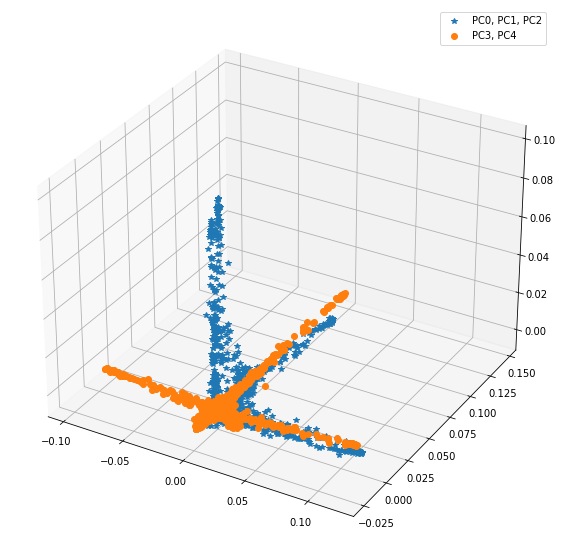

In [29]:
# for i in range(len(images)):
#     pca(images[i])
pca(trunc_img)

In [30]:
#return the singular values
def svd(res):
    # Applying SVD
    U, S, VT = np.linalg.svd(res,full_matrices=False,# It's not necessary to compute the full matrix of U or V
        compute_uv=True) # Deterministic SVD

    S = np.diag(S) #singular value matrix
    #print("singular val ",S)
    sv = []
    for i in range(55):
        sv.append(S[i])#[i])
    return sv

In [41]:
#pca on singular values
def pca_sv(svd):

    #Scale data before applying PCA
    scaling = StandardScaler()
    names = []
    for r in range(500):
        names.append( 'PC'+str(r) )

    pc_df = pd.DataFrame(['','PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'PC109', 'PC110', 'PC111', 'PC112', 'PC113', 'PC114', 'PC115', 'PC116', 'PC117', 'PC118', 'PC119', 'PC120', 'PC121', 'PC122', 'PC123', 'PC124', 'PC125', 'PC126', 'PC127', 'PC128', 'PC129', 'PC130', 'PC131', 'PC132', 'PC133', 'PC134', 'PC135', 'PC136', 'PC137', 'PC138', 'PC139', 'PC140', 'PC141', 'PC142', 'PC143', 'PC144', 'PC145', 'PC146', 'PC147', 'PC148', 'PC149', 'PC150', 'PC151', 'PC152', 'PC153', 'PC154', 'PC155', 'PC156', 'PC157', 'PC158', 'PC159', 'PC160', 'PC161', 'PC162', 'PC163', 'PC164', 'PC165', 'PC166', 'PC167', 'PC168', 'PC169', 'PC170', 'PC171', 'PC172', 'PC173', 'PC174', 'PC175', 'PC176', 'PC177', 'PC178', 'PC179', 'PC180', 'PC181', 'PC182', 'PC183', 'PC184', 'PC185', 'PC186', 'PC187', 'PC188', 'PC189', 'PC190', 'PC191', 'PC192', 'PC193', 'PC194', 'PC195', 'PC196', 'PC197', 'PC198', 'PC199', 'PC200', 'PC201', 'PC202', 'PC203', 'PC204', 'PC205', 'PC206', 'PC207', 'PC208', 'PC209', 'PC210', 'PC211', 'PC212', 'PC213', 'PC214', 'PC215', 'PC216', 'PC217', 'PC218', 'PC219', 'PC220', 'PC221', 'PC222', 'PC223', 'PC224', 'PC225', 'PC226', 'PC227', 'PC228', 'PC229', 'PC230', 'PC231', 'PC232', 'PC233', 'PC234', 'PC235', 'PC236', 'PC237', 'PC238', 'PC239', 'PC240', 'PC241', 'PC242', 'PC243', 'PC244', 'PC245', 'PC246', 'PC247', 'PC248', 'PC249', 'PC250', 'PC251', 'PC252', 'PC253', 'PC254', 'PC255', 'PC256', 'PC257', 'PC258', 'PC259', 'PC260', 'PC261', 'PC262', 'PC263', 'PC264', 'PC265', 'PC266', 'PC267', 'PC268', 'PC269', 'PC270', 'PC271', 'PC272', 'PC273', 'PC274', 'PC275', 'PC276', 'PC277', 'PC278', 'PC279', 'PC280', 'PC281', 'PC282', 'PC283', 'PC284', 'PC285', 'PC286', 'PC287', 'PC288', 'PC289', 'PC290', 'PC291', 'PC292', 'PC293', 'PC294', 'PC295', 'PC296', 'PC297', 'PC298', 'PC299', 'PC300', 'PC301', 'PC302', 'PC303', 'PC304', 'PC305', 'PC306', 'PC307', 'PC308', 'PC309', 'PC310', 'PC311', 'PC312', 'PC313', 'PC314', 'PC315', 'PC316', 'PC317', 'PC318', 'PC319', 'PC320', 'PC321', 'PC322', 'PC323', 'PC324', 'PC325', 'PC326', 'PC327', 'PC328', 'PC329', 'PC330', 'PC331', 'PC332', 'PC333', 'PC334', 'PC335', 'PC336', 'PC337', 'PC338', 'PC339', 'PC340', 'PC341', 'PC342', 'PC343', 'PC344', 'PC345', 'PC346', 'PC347', 'PC348', 'PC349', 'PC350', 'PC351', 'PC352', 'PC353', 'PC354', 'PC355', 'PC356', 'PC357', 'PC358', 'PC359', 'PC360', 'PC361', 'PC362', 'PC363', 'PC364', 'PC365', 'PC366', 'PC367', 'PC368', 'PC369', 'PC370', 'PC371', 'PC372', 'PC373', 'PC374', 'PC375', 'PC376', 'PC377', 'PC378', 'PC379', 'PC380', 'PC381', 'PC382', 'PC383', 'PC384', 'PC385', 'PC386', 'PC387', 'PC388', 'PC389', 'PC390', 'PC391', 'PC392', 'PC393', 'PC394', 'PC395', 'PC396', 'PC397', 'PC398', 'PC399', 'PC400', 'PC401', 'PC402', 'PC403', 'PC404', 'PC405', 'PC406', 'PC407', 'PC408', 'PC409', 'PC410', 'PC411', 'PC412', 'PC413', 'PC414', 'PC415', 'PC416', 'PC417', 'PC418', 'PC419', 'PC420', 'PC421', 'PC422', 'PC423', 'PC424', 'PC425', 'PC426', 'PC427', 'PC428', 'PC429', 'PC430', 'PC431', 'PC432', 'PC433', 'PC434', 'PC435', 'PC436', 'PC437', 'PC438', 'PC439', 'PC440', 'PC441', 'PC442', 'PC443', 'PC444', 'PC445', 'PC446', 'PC447', 'PC448', 'PC449', 'PC450', 'PC451', 'PC452', 'PC453', 'PC454', 'PC455', 'PC456', 'PC457', 'PC458', 'PC459', 'PC460', 'PC461', 'PC462', 'PC463', 'PC464', 'PC465', 'PC466', 'PC467', 'PC468', 'PC469', 'PC470', 'PC471', 'PC472', 'PC473', 'PC474', 'PC475', 'PC476', 'PC477', 'PC478', 'PC479', 'PC480', 'PC481', 'PC482', 'PC483', 'PC484', 'PC485', 'PC486', 'PC487', 'PC488', 'PC489', 'PC490', 'PC491', 'PC492', 'PC493', 'PC494', 'PC495', 'PC496', 'PC497', 'PC498', 'PC499'], columns=['PC'])
    data = pd.DataFrame(data=svd)

    #use fit and transform method
    scaling.fit(data)
    Scaled_data = scaling.transform(data)

    #set the n_components
    principal = PCA(n_components=10)
    principal.fit(Scaled_data)
    scores = principal.transform(Scaled_data)
    
    names =[]
    for r in range(10):
        names.append('PC'+str(r))
    scores_df = pd.DataFrame(scores)
    scores_df.columns =[names]
    #print("table of principal components\n ", scores_df)

    # Check the values of eigen vectors
    # prodeced by principal components
    #print("composants principaux ",principal.components_)
    # check how much variance is explained by each principal component
    explained_variance = principal.explained_variance_ratio_
    #print("variance : ",explained_variance)

    explained_variance = np.insert(explained_variance, 0, 0) # setting x=0; y=0 to make the screeplot
    cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
    explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
    cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
    df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1).dropna()
    print("table of variances\n ",df_explained_variance)

    #max value and sum of the explained variance
    max_val = df_explained_variance[['Explained Variance']].max()
    print("Max Variance ",max_val)
    print("somme totale variance ",df_explained_variance[['Explained Variance']].sum())

    # explained variance + cumulative variance (separate plot)
    fig = make_subplots(rows=3, cols=1)

    fig.add_trace(
        go.Scatter(
            x=df_explained_variance['PC'],
            y=df_explained_variance['Cumulative Variance'],
            marker=dict(size=15, color="LightSeaGreen")
        ), row=1, col=1
        )

    fig.add_trace(
        go.Bar(
            x=df_explained_variance['PC'],
            y=df_explained_variance['Explained Variance'],
            marker=dict(color="RoyalBlue"),
        ), row=3, col=1
        )
    fig.show()

    # 3d plot


    # loadings = principal.components_.T
    # df_loadings = pd.DataFrame(loadings)
    # df_loadings.columns = [names]
    # #import relevant libraries for 3d graph
    # from mpl_toolkits.mplot3d import Axes3D
    # from random import randrange
    # #creating figure
    # fig = plt.figure(figsize=(10,10))
    # #choose projection 3d for creating a 3d graph
    # axis = fig.add_subplot(111,projection='3d')
    # #create color map
    # color_map = plt.get_cmap('hot')
    # v = scores[:,0]+scores[:,1]+scores[:,2]
    # #create scatter plot and colorbar
    # #scatter_plot = axis.scatter(scores[:,0],scores[:,1],scores[:,2], v, s=50, c=np.abs(v), cmap=color_map)

    # axis.plot(loadings[:,0],loadings[:,1],loadings[:,2], loadings[:,3], "*", label="PC0, PC1, PC2, PC4")
    # axis.plot(loadings[:,3],loadings[:,4],loadings[:,5], "o", label="PC3, PC4, PC5")
    # axis.legend(loc="upper right")
    # #plt.colorbar(scatter_plot)
    # plt.show()



In [32]:
# loading singular values
singular_values = []
for i in range(len(mat_val)):
    singular_values.append( svd(mat_val[i]))

In [39]:
# keep only first 10 singular values
tmp = []
for s in range(len(singular_values)):
    for it in range(0,10):
        tmp.append(singular_values[s].__getitem__(it))


In [40]:
trunc_data = np.reshape(tmp, (len(singular_values),10))

In [42]:
pca_sv(trunc_data)

table of variances
       PC  Explained Variance  Cumulative Variance
0                  0.000000                0.000
1   PC0            0.201266                0.201
2   PC1            0.172426                0.373
3   PC2            0.152637                0.526
4   PC3            0.117933                0.644
5   PC4            0.100310                0.744
6   PC5            0.099386                0.843
7   PC6            0.070235                0.913
8   PC7            0.042708                0.956
9   PC8            0.032433                0.988
10  PC9            0.010666                0.999
Max Variance  Explained Variance    0.201266
dtype: float32
somme totale variance  Explained Variance    1.0
dtype: float32
